### 2020.04.20

## SAFB1/2 KO biorxiv, 293T and Ramos  
  * GEO: GSE141098: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4194973	  

  * Samples  
    * 293T wt  
    SRR10544945, SRR10544946, SRR10544947   
  
    * 293T SAFB1/2 DKO  
    SRR10544948, SRR10544949, SRR10544950  
	
    * Ramos wt  
    SRR10544939, SRR10544940, SRR10544941  
 
    * Ramos SAFB1/2 DKO  
    SRR10544942, SRR10544943, SRR10544944    
 
  * Data download from GEO  
    wget https://sra-download.ncbi.nlm.nih.gov/traces/sra4/SRR/010297/SRR10544945 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra12/SRR/010297/SRR10544946 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra72/SRR/010297/SRR10544947 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra21/SRR/010297/SRR10544948 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra75/SRR/010297/SRR10544949 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra8/SRR/010297/SRR10544950  
  
    wget https://sra-download.ncbi.nlm.nih.gov/traces/sra17/SRR/010297/SRR10544944 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra17/SRR/010297/SRR10544943 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra22/SRR/010297/SRR10544942 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra7/SRR/010297/SRR10544941 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra4/SRR/010297/SRR10544940 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra10/SRR/010297/SRR10544939  

  * Unzip  
  fastq-dump --gzip *  
  
  * adaptor information
    "Cells were harvested, washed once with PBS and total RNA was isolated with the miRNEasy Kit (QIAGEN) according to the manufacturer's recommendation. Libraries for Illumina sequencing were prepared with the Somagenics RealSeq-AC miRNA library Kit, using 100 ng total RNA as input."  
    https://www.somagenics.com/technologyrealseq  
      
    Barberán-Soler et al. Genome Biology (2018) 19:105  
    AppTGGAATTCTCGGGTGCCAAGG/idSp/idSp/rGrUrUrCrArGrArGrUrUrCrUrArCrArGrUrC (*same to ours*)

## DGCR8 2ex Nat Commun, hMSC  
  * GEO: https://www.ncbi.nlm.nih.gov//geo/query/acc.cgi?acc=GSE116303  
  * Samples  
    * hMSC wt  
    SRR7439004, SRR7439005  
    * hMSC DGCR8_dex2  
    SRR7439006, SRR7439007  
 
  * Data download from GEO   
  wget https://sra-download.ncbi.nlm.nih.gov/traces/sra65/SRR/007264/SRR7439007 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra65/SRR/007264/SRR7439006 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra66/SRR/007264/SRR7439005 && wget https://sra-download.ncbi.nlm.nih.gov/traces/sra65/SRR/007264/SRR7439004  
	    
  * unzip  
  fastq-dump --gzip *
  
  * adaptor information  
    "DNA was isolated using phenol-chloroform-isoamylalcohol extraction and ethanol precipitation. Sequencing libraries were generated using NEBNext® Multiplex Small RNA Library Prep Set for Illumina® (NEB, USA.) following manufacturer's recommendations and index codes were added to attribute sequences to each sample."  
      
    "Read 1 should be trimmed with AGATCGGAAGAGCACACGTCTGAACTCCAGTCAC (note: other vendors use different 5’ sequences)"  
    https://international.neb.com/faqs/2017/07/17/how-should-my-nebnext-small-rna-library-be-trimmed

### (Snakefile_sean_v3; I didn't filter out multiple mapped reads.)

### Snakemake modification
 
* modified from Snakefile_sean_v3:
 * modified adaptor seq
 * removed random barcodes
 * added fastq_to_fasta
 * removed collapsing  
  
* run: snakemake -j 18 -s Snakefile_sean_v5_nobarcode  


### make a count file for each experiment


In [3]:
import pandas as pd
import os
import glob

In [4]:
# ERH data

sWorkingDir = '/casa/jimkwon/PROJECT/ERH/data/200110_hiseq/analysis/annotated/'

lSamples = ['A1siGFP','A2siNC','A3siERH3',
            'B1siGFP','B2siNC','B3siERH3','B4siERH5',
            'BK16siGFP','BK19siERH5']
sOutFile = '/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/count_ERH.txt'

fPseudoCount = 1

lCountDataFrames = []
for sSample in lSamples:
    print(sSample)
    sMirnaCountFile = os.path.join(sWorkingDir, sSample + '.mirna.count.txt')
    
    dfCount = pd.read_table(sMirnaCountFile, names=[sSample, 'name'], sep=' ', skipinitialspace=True)
    dfCount['name'] = dfCount['name'].apply(lambda x: x.split('Name=')[1])
        
    dfCount = dfCount.set_index('name')
    lCountDataFrames.append(dfCount)

dfMerged = lCountDataFrames[0].join(lCountDataFrames[1:], how='outer', sort=True)

dfMerged.to_csv(sOutFile, sep='\t')

A1siGFP
A2siNC
A3siERH3
B1siGFP
B2siNC
B3siERH3
B4siERH5
BK16siGFP
BK19siERH5


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6369: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


In [5]:
# biorxiv data: 293T

sWorkingDir = '/casa/jimkwon/PROJECT/ERH/data/200219_biorxiv/293T/analysis/annotated/'

lSamples = ['SRR10544945','SRR10544946','SRR10544947',
            'SRR10544948','SRR10544949','SRR10544950']            
            # 45-47: wt
            # 48-50: SAFB DKO
sOutFile = '/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/count_SAFBKO_293T.txt'

fPseudoCount = 1

lCountDataFrames = []
for sSample in lSamples:
    print(sSample)
    sMirnaCountFile = os.path.join(sWorkingDir, sSample + '.mirna.count.txt')
    
    dfCount = pd.read_table(sMirnaCountFile, names=[sSample, 'name'], sep=' ', skipinitialspace=True)
    dfCount['name'] = dfCount['name'].apply(lambda x: x.split('Name=')[1])
        
    dfCount = dfCount.set_index('name')
    lCountDataFrames.append(dfCount)

dfMerged = lCountDataFrames[0].join(lCountDataFrames[1:], how='outer', sort=True)

dfMerged.to_csv(sOutFile, sep='\t')

SRR10544945
SRR10544946
SRR10544947
SRR10544948
SRR10544949
SRR10544950


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6369: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


In [6]:
# biorxiv data: Ramos

sWorkingDir = '/casa/jimkwon/PROJECT/ERH/data/200219_biorxiv/Ramos/analysis/annotated/'

lSamples = ['SRR10544939','SRR10544940','SRR10544941',
            'SRR10544942','SRR10544943','SRR10544944']            
            # 39-41: wt
            # 42-44: SAFB DKO
sOutFile = '/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/count_SAFBKO_Ramos.txt'

fPseudoCount = 1

lCountDataFrames = []
for sSample in lSamples:
    print(sSample)
    sMirnaCountFile = os.path.join(sWorkingDir, sSample + '.mirna.count.txt')
    
    dfCount = pd.read_table(sMirnaCountFile, names=[sSample, 'name'], sep=' ', skipinitialspace=True)
    dfCount['name'] = dfCount['name'].apply(lambda x: x.split('Name=')[1])
        
    dfCount = dfCount.set_index('name')
    lCountDataFrames.append(dfCount)

dfMerged = lCountDataFrames[0].join(lCountDataFrames[1:], how='outer', sort=True)

dfMerged.to_csv(sOutFile, sep='\t')

SRR10544939
SRR10544940
SRR10544941
SRR10544942
SRR10544943
SRR10544944


In [7]:
# Nat Commun: hMSC, DGCR8 del ex2

sWorkingDir = '/casa/jimkwon/PROJECT/ERH/data/200221_natcomm/analysis/annotated/'

lSamples = ['SRR7439004','SRR7439005',
            'SRR7439006','SRR7439007']            
            # 4-5: wt
            # 6-7: DGCR8 ex2
sOutFile = '/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/count_DGCR8_ex2.txt'

fPseudoCount = 1

lCountDataFrames = []
for sSample in lSamples:
    print(sSample)
    sMirnaCountFile = os.path.join(sWorkingDir, sSample + '.mirna.count.txt')
    
    dfCount = pd.read_table(sMirnaCountFile, names=[sSample, 'name'], sep=' ', skipinitialspace=True)
    dfCount['name'] = dfCount['name'].apply(lambda x: x.split('Name=')[1])
        
    dfCount = dfCount.set_index('name')
    lCountDataFrames.append(dfCount)

dfMerged = lCountDataFrames[0].join(lCountDataFrames[1:], how='outer', sort=True)

dfMerged.to_csv(sOutFile, sep='\t')

SRR7439004
SRR7439005
SRR7439006
SRR7439007


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6369: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


### DESeq2 tutorial

https://bioc.ism.ac.jp/packages/2.14/bioc/vignettes/DESeq2/inst/doc/beginner.pdf

### Download R, RStudio in Windows

https://bioconductor.org/packages/release/bioc/html/DESeq2.html



## file location:

X:\PROJECT\ERH\results\200420_sRNAseq_RPM

In [5]:
# I made sampletype1.txt using excel, then did DESeq2 on each sample. 2020.04.20

# R code
"""
```{r}
dfCount <- read.table(file="count_SAFBKO_Ramos.txt", sep='\t', header=TRUE, row.names=1)
dfCount
```
```{r}
dfCount[is.na(dfCount)] <- 0
dfCount
```
```{r}
dfSample <- read.table("sampletype_SAFBKO_Ramos.txt", sep='\t', header=TRUE, row.names=1)
dfSample
```
```{r}
ddsFullCountTable <- DESeqDataSetFromMatrix(
        countData = dfCount,
        colData = dfSample,
        design = ~ exptype)
ddsFullCountTable
```
```{r}
dds <- ddsFullCountTable
dds$exptype
```
```{r}
dds$exptype <- relevel(dds$exptype, "Ramos_wt")
dds$exptype
```
```{r}
as.data.frame(colData(dds))
```
```{r}
dds <- DESeq(dds)
```
```{r}
res <- results(dds)
res
```
```{r}
sum(res$padj < 0.1, na.rm=TRUE)
```
```{r}
plotMA(res, ylim=c(-5,5))
```
```{r}
plotDispEsts(dds, ylim=c(1e-3, 1e1))
```
```{r}
hist(res$padj, breaks=20, col='grey')
```
```{r}
write.csv(as.data.frame(res), file='deseq_results_SAFBKO_Ramos.csv')
"""

'\nif (!requireNamespace("BiocManager", quietly = TRUE))\n        install.packages("BiocManager")\n\nBiocManager::install("DESeq2")\n\nlibrary("DESeq2")\n#getwd()\ndfCount <- read.table(file="count.txt", sep=\'\t\', header=TRUE, row.names=1)\n\ndfCount <- dfCount[,1:9]\ndfCount[is.na(dfCount)] <- 0\ndfSample <- read.table("sampletype1.txt", sep=\'\t\', header=TRUE, row.names=1)\n\nddsFullCountTable <- DESeqDataSetFromMatrix(\n        countData = dfCount,\n        colData = dfSample,\n        design = ~ exptype)\ndds <- ddsFullCountTable\ndds$exptype <- relevel(dds$exptype, "control")\nas.data.frame(colData(dds))\ndds <- DESeq(dds)\nresSafb2 <- results(dds, contrast = c("exptype", "siSAFB2", "control"))\nresErh <- results(dds, contrast = c("exptype", "siERH", "control"))\nsum(resErh$padj < 0.1, na.rm=TRUE)\nsum(resSafb2$padj < 0.1, na.rm=TRUE)\nplotMA(resErh, ylim=c(-5,5))\nplotDispEsts(dds, ylim=c(1e-3, 1e1))\nhist(resErh$padj, breaks=20, col=\'grey\')\nwrite.csv(as.data.frame(resErh),

In [8]:
dfExptype = pd.read_table('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/sampletype_SAFBKO_Ramos.txt')
dfExptype

,Unnamed: 0,samplename,exptype
0,SRR10544939,SRR10544939,Ramos_wt
1,SRR10544940,SRR10544940,Ramos_wt
2,SRR10544941,SRR10544941,Ramos_wt
3,SRR10544942,SRR10544942,Ramos_SAFB_DKO
4,SRR10544943,SRR10544943,Ramos_SAFB_DKO
5,SRR10544944,SRR10544944,Ramos_SAFB_DKO


In [9]:
dfExptype = pd.read_table('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/sampletype_SAFBKO_293T.txt')
dfExptype

,Unnamed: 0,samplename,exptype
0,SRR10544945,SRR10544945,293T_wt
1,SRR10544946,SRR10544946,293T_wt
2,SRR10544947,SRR10544947,293T_wt
3,SRR10544948,SRR10544948,293T_SAFB_DKO
4,SRR10544949,SRR10544949,293T_SAFB_DKO
5,SRR10544950,SRR10544950,293T_SAFB_DKO


In [10]:
dfExptype = pd.read_table('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/sampletype_DGCR8_ex2.txt')
dfExptype

,Unnamed: 0,samplename,exptype
0,SRR7439004,SRR7439004,hMSCwt
1,SRR7439005,SRR7439005,hMSCwt
2,SRR7439006,SRR7439006,DGCR8dex2
3,SRR7439007,SRR7439007,DGCR8dex2


In [11]:
dfExptype = pd.read_table('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/sampletype_ERH.txt')
dfExptype

,Unnamed: 0,samplename,exptype
0,A1siGFP,A1siGFP,control
1,A2siNC,A2siNC,control
2,A3siERH3,A3siERH3,siERH
3,B1siGFP,B1siGFP,control
4,B2siNC,B2siNC,control
5,B3siERH3,B3siERH3,siERH
6,B4siERH5,B4siERH5,siERH


## load DESeq2 result tables and draw volcano plots

In [194]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import matplotlib.gridspec as gridspec

# ERH

In [247]:
# Deseq data

dfDeseq = pd.read_csv('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/deseq_results_ERH.csv', index_col=0)
fCutoff_baseMean = 400 #279 miRNA are expressed in this condition
#fCutoff_baseMean = 1400 #200 miRNA are expressed in this condition
fCutoff_FC = 1
fCutoff_P = 0.1 # padj
sSample = '293E_siERH'

In [248]:
dfDeseq['name'] = dfDeseq.index
dfDeseq = dfDeseq.fillna(1) #NaN in padj into 1
dfDeseq['-log_padj'] = dfDeseq.apply(lambda row: -np.log(row['padj']), axis=1)

# filter (expression level)
dfDeseq = dfDeseq[dfDeseq['baseMean'] > fCutoff_baseMean]

# select some miRNAs
dfDeseq['isFC'] = dfDeseq.apply(lambda row: 
                                True if row['log2FoldChange'] > fCutoff_FC or row['log2FoldChange'] < -fCutoff_FC 
                                else False,
                                axis=1)
dfDeseq['isP'] = dfDeseq.apply(lambda row: True if row['padj'] < fCutoff_P else False, axis=1)
dfDeseq

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,-log_padj,isFC,isP
hsa-let-7a-1,8683.520704,0.219420,0.225991,0.970923,3.315867e-01,5.322726e-01,hsa-let-7a-1,0.630600,False,False
hsa-let-7a-2,8225.384856,0.219430,0.228569,0.960015,3.370476e-01,5.337163e-01,hsa-let-7a-2,0.627891,False,False
hsa-let-7a-3,8742.881527,0.217220,0.226370,0.959579,3.372670e-01,5.337163e-01,hsa-let-7a-3,0.627891,False,False
hsa-let-7b,681.129963,0.210039,0.267824,0.784245,4.328962e-01,6.008733e-01,hsa-let-7b,0.509371,False,False
hsa-let-7c,2846.814959,-0.206843,0.226681,-0.912485,3.615134e-01,5.501096e-01,hsa-let-7c,0.597638,False,False
hsa-let-7d,732.139260,-0.029820,0.216232,-0.137905,8.903154e-01,9.488765e-01,hsa-let-7d,0.052477,False,False
hsa-let-7e,1809.562573,0.600744,0.328921,1.826409,6.778867e-02,1.853998e-01,hsa-let-7e,1.685241,False,False
hsa-let-7f-1,4625.132328,0.281112,0.237201,1.185120,2.359700e-01,4.292906e-01,hsa-let-7f-1,0.845621,False,False
hsa-let-7f-2,4868.416201,0.259757,0.229517,1.131755,2.577375e-01,4.489385e-01,hsa-let-7f-2,0.800869,False,False
hsa-let-7g,4393.963586,-0.175378,0.222305,-0.788907,4.301666e-01,5.995966e-01,hsa-let-7g,0.511498,False,False


In [249]:
dfDeseqSelected = dfDeseq[dfDeseq['isFC'] == True]
dfDeseqSelected = dfDeseqSelected[dfDeseqSelected['isP'] == True]
dfDeseqSelected

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,-log_padj,isFC,isP
hsa-mir-1306,1622.205785,-1.822237,0.157018,-11.605242,3.875914e-31,7.932704e-29,hsa-mir-1306,64.703974,True,True
hsa-mir-15a,20387.718043,-1.355923,0.231540,-5.856100,4.738625e-09,1.353263e-07,hsa-mir-15a,15.815577,True,True
hsa-mir-181b-1,12031.694416,-1.482670,0.169692,-8.737402,2.385329e-18,1.952789e-16,hsa-mir-181b-1,36.172103,True,True
hsa-mir-181b-2,12071.536965,-1.495546,0.171716,-8.709389,3.055172e-18,2.344845e-16,hsa-mir-181b-2,35.989142,True,True
hsa-mir-181c,3313.148694,-1.182735,0.209393,-5.648391,1.619565e-08,4.077506e-07,hsa-mir-181c,14.712610,True,True
hsa-mir-181d,2082.236144,-1.541634,0.149255,-10.328837,5.218970e-25,8.011119e-23,hsa-mir-181d,50.878627,True,True
hsa-mir-192,1153.831368,-1.636812,0.175694,-9.316255,1.205195e-20,1.233316e-18,hsa-mir-192,41.236825,True,True
hsa-mir-210,8707.922685,-1.015566,0.201522,-5.039483,4.667912e-07,8.555516e-06,hsa-mir-210,11.668934,True,True
hsa-mir-29c,9577.804200,-1.137481,0.205675,-5.530480,3.193557e-08,7.794103e-07,hsa-mir-29c,14.064728,True,True
hsa-mir-3157,556.498918,1.527115,0.196460,7.773169,7.654629e-15,4.699942e-13,hsa-mir-3157,28.386056,True,True


In [250]:
lFC = dfDeseq['log2FoldChange'].tolist()
lPadj = dfDeseq['-log_padj'].tolist()

lSelectedName = dfDeseqSelected['name'].tolist()
lSelectedFC = dfDeseqSelected['log2FoldChange'].tolist()
lSelectedPadj = dfDeseqSelected['-log_padj'].tolist()

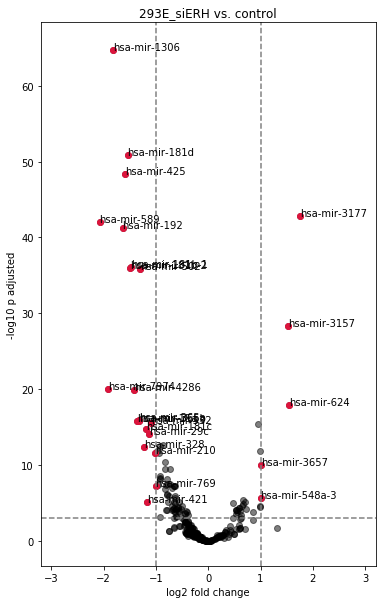

In [251]:
# figure        
fig, ax = plt.subplots(figsize=(6,10))

ax.scatter(lFC, lPadj, color='black', alpha=0.5)
ax.scatter(lSelectedFC, lSelectedPadj, color='crimson')

for nOrder, sNameMir in enumerate(lSelectedName):
    if np.isnan(lSelectedFC[nOrder]) == True:
        continue
    if np.isnan(lSelectedPadj[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lSelectedFC[nOrder], lSelectedPadj[nOrder]))


plt.axhline(-np.log(0.05), color='gray', linestyle='--')
plt.axvline(-1, color='gray', linestyle='--')
plt.axvline(1, color='gray', linestyle='--')
plt.xlim([-3.2, 3.2])
#plt.ylim([-5, 5])


plt.xlabel('log2 fold change')
plt.ylabel('-log10 p adjusted')
plt.title('{} vs. control'.format(sSample))
#plt.show()
plt.savefig('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/{}.pdf'.format(sSample), transparent=True)
#plt.close()

## Merge tables

expression level: top 150 from each dataset

In [200]:
dfErh = pd.read_csv('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/deseq_results_ERH.csv', index_col=0)
dfErh = dfErh.iloc[:,0:2]
dfErh = dfErh.rename(columns={'baseMean':'baseMean_ERH', 'log2FoldChange':'log2FC_ERH'})
dfErh

,baseMean_ERH,log2FC_ERH
hsa-let-7a-1,8683.520704,0.219420
hsa-let-7a-2,8225.384856,0.219430
hsa-let-7a-3,8742.881527,0.217220
hsa-let-7b,681.129963,0.210039
hsa-let-7c,2846.814959,-0.206843
hsa-let-7d,732.139260,-0.029820
hsa-let-7e,1809.562573,0.600744
hsa-let-7f-1,4625.132328,0.281112
hsa-let-7f-2,4868.416201,0.259757
hsa-let-7g,4393.963586,-0.175378


In [201]:
dfEx2 = pd.read_csv('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/deseq_results_DGCR8_ex2.csv', index_col=0)
dfEx2 = dfEx2.iloc[:,0:2]
dfEx2 = dfEx2.rename(columns={'baseMean':'baseMean_DGCR8_ex2', 'log2FoldChange':'log2FC_DGCR8_ex2'})
dfEx2

,baseMean_DGCR8_ex2,log2FC_DGCR8_ex2
hsa-let-7a-1,9.666015e+04,0.294661
hsa-let-7a-2,9.605451e+04,0.301386
hsa-let-7a-3,9.666205e+04,0.294429
hsa-let-7b,2.209431e+03,-0.537586
hsa-let-7c,2.960214e+03,-0.299211
hsa-let-7d,2.564057e+03,-0.103734
hsa-let-7e,1.598249e+04,-0.238038
hsa-let-7f-1,7.924783e+04,-0.320585
hsa-let-7f-2,7.955777e+04,-0.318932
hsa-let-7g,1.010028e+05,0.094401


In [202]:
df293T = pd.read_csv('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/deseq_results_SAFBKO_293T.csv', index_col=0)
df293T = df293T.iloc[:,0:2]
df293T = df293T.rename(columns={'baseMean':'baseMean_SAFBKO_293T', 'log2FoldChange':'log2FC_SAFBKO_293T'})
df293T

,baseMean_SAFBKO_293T,log2FC_SAFBKO_293T
hsa-let-7a-1,723.212157,0.306155
hsa-let-7a-2,705.566057,0.306482
hsa-let-7a-3,727.474682,0.301507
hsa-let-7b,25.212226,0.538679
hsa-let-7c,42.461980,0.234610
hsa-let-7d,328.178591,0.061064
hsa-let-7e,103.962455,-0.164114
hsa-let-7f-1,244.426613,0.227232
hsa-let-7f-2,281.532040,0.245094
hsa-let-7g,73.591371,0.132820


In [203]:
dfRamos = pd.read_csv('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/deseq_results_SAFBKO_Ramos.csv', index_col=0)
dfRamos = dfRamos.iloc[:,0:2]
dfRamos = dfRamos.rename(columns={'baseMean':'baseMean_SAFBKO_Ramos', 'log2FoldChange':'log2FC_SAFBKO_Ramos'})
dfRamos

,baseMean_SAFBKO_Ramos,log2FC_SAFBKO_Ramos
hsa-let-7a-1,1162.913494,-0.278615
hsa-let-7a-2,1152.120113,-0.273072
hsa-let-7a-3,1162.491668,-0.278895
hsa-let-7b,2.731999,0.561167
hsa-let-7c,6.507669,-3.034701
hsa-let-7d,120.861332,0.204016
hsa-let-7e,1211.120478,-0.496580
hsa-let-7f-1,310.727275,-0.173664
hsa-let-7f-2,324.542186,-0.133271
hsa-let-7g,86.799481,-0.087708


In [204]:
# BSC table

dfBsc = pd.read_csv('/casa/jimkwon/PROJECT/ERH/results/191218_bsc/191218_miRNA_information.csv', index_col=0)
dfBsc = dfBsc.replace('N.D', 0)
dfBsc

,Nearest neighbor,Distance (nt),Cleavage Score w/ SRSF3,Cleavage Score w/ MP only,Lower stem (bp),Upper stem (bp),Loop (nt),Largest internal loop (nt)
hsa-let-7a-1,hsa-let-7f-1,311,6.88,2.42,11.0,21.0,27.0,4.0
hsa-let-7a-2,hsa-mir-100,-5636,5.90,1.60,14.0,22.0,10.0,4.0
hsa-let-7a-3,hsa-mir-4763,744,4.11,-0.23,14.0,21.0,24.0,1.0
hsa-let-7b,hsa-mir-4763,29,6.62,1.35,15.0,20.0,32.0,3.0
hsa-let-7c,hsa-mir-99a,659,5.62,-0.98,13.0,25.0,11.0,4.0
hsa-let-7d,hsa-let-7f-1,2401,5.56,2.16,15.0,21.0,30.0,2.0
hsa-let-7e,hsa-mir-99b,105,5.94,2.47,13.0,22.0,18.0,4.0
hsa-let-7f-1,hsa-let-7a-1,311,5.70,0.22,13.0,23.0,28.0,5.0
hsa-let-7f-2,hsa-mir-98,-851,6.48,2.19,13.0,20.0,28.0,1.0
hsa-let-7g,hsa-mir-135a-1,-25858,5.73,1.28,14.0,21.0,33.0,2.0


In [205]:
dfMerged = pd.merge(dfBsc, dfErh, how='left', left_index=True, right_index=True)
dfMerged = pd.merge(dfMerged, dfEx2, how='left', left_index=True, right_index=True)
dfMerged = pd.merge(dfMerged, df293T, how='left', left_index=True, right_index=True)
dfMerged = pd.merge(dfMerged, dfRamos, how='left', left_index=True, right_index=True)
dfMerged

,Nearest neighbor,Distance (nt),Cleavage Score w/ SRSF3,Cleavage Score w/ MP only,Lower stem (bp),Upper stem (bp),Loop (nt),Largest internal loop (nt),baseMean_ERH,log2FC_ERH,baseMean_DGCR8_ex2,log2FC_DGCR8_ex2,baseMean_SAFBKO_293T,log2FC_SAFBKO_293T,baseMean_SAFBKO_Ramos,log2FC_SAFBKO_Ramos
hsa-let-7a-1,hsa-let-7f-1,311,6.88,2.42,11.0,21.0,27.0,4.0,8683.520704,0.219420,9.666015e+04,0.294661,723.212157,0.306155,1162.913494,-0.278615
hsa-let-7a-2,hsa-mir-100,-5636,5.90,1.60,14.0,22.0,10.0,4.0,8225.384856,0.219430,9.605451e+04,0.301386,705.566057,0.306482,1152.120113,-0.273072
hsa-let-7a-3,hsa-mir-4763,744,4.11,-0.23,14.0,21.0,24.0,1.0,8742.881527,0.217220,9.666205e+04,0.294429,727.474682,0.301507,1162.491668,-0.278895
hsa-let-7b,hsa-mir-4763,29,6.62,1.35,15.0,20.0,32.0,3.0,681.129963,0.210039,2.209431e+03,-0.537586,25.212226,0.538679,2.731999,0.561167
hsa-let-7c,hsa-mir-99a,659,5.62,-0.98,13.0,25.0,11.0,4.0,2846.814959,-0.206843,2.960214e+03,-0.299211,42.461980,0.234610,6.507669,-3.034701
hsa-let-7d,hsa-let-7f-1,2401,5.56,2.16,15.0,21.0,30.0,2.0,732.139260,-0.029820,2.564057e+03,-0.103734,328.178591,0.061064,120.861332,0.204016
hsa-let-7e,hsa-mir-99b,105,5.94,2.47,13.0,22.0,18.0,4.0,1809.562573,0.600744,1.598249e+04,-0.238038,103.962455,-0.164114,1211.120478,-0.496580
hsa-let-7f-1,hsa-let-7a-1,311,5.70,0.22,13.0,23.0,28.0,5.0,4625.132328,0.281112,7.924783e+04,-0.320585,244.426613,0.227232,310.727275,-0.173664
hsa-let-7f-2,hsa-mir-98,-851,6.48,2.19,13.0,20.0,28.0,1.0,4868.416201,0.259757,7.955777e+04,-0.318932,281.532040,0.245094,324.542186,-0.133271
hsa-let-7g,hsa-mir-135a-1,-25858,5.73,1.28,14.0,21.0,33.0,2.0,4393.963586,-0.175378,1.010028e+05,0.094401,73.591371,0.132820,86.799481,-0.087708


In [206]:
dfMerged.to_csv('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/merged_table.csv')

## Scatter plots 

Scatter plots + clustered miRNAs

In [207]:
from scipy.stats import spearmanr as spearmanr
from scipy.stats import pearsonr as pearsonr

In [208]:
"""
fCutoff_baseMean = 300 #ERH
fCutoff_baseMean = 100 #Ex2
fCutoff_baseMean = 50 #293T
fCutoff_baseMean = 100 #Ramos
"""

'\nfCutoff_baseMean = 300 #ERH\nfCutoff_baseMean = 100 #Ex2\nfCutoff_baseMean = 50 #293T\nfCutoff_baseMean = 100 #Ramos\n'

### ERH vs. DGCR8 ex2

In [252]:
fCutoff_ERH = 400
fCutoff_Ex2 = 100
fCutoff_293T = 50
fCutoff_Ramos = 100

fCutoff_FC = 1

sX = 'baseMean_ERH'
sY = 'baseMean_DGCR8_ex2'
sFC_X = 'log2FC_ERH'
sFC_Y = 'log2FC_DGCR8_ex2'
fCutoff_X = fCutoff_ERH
fCutoff_Y = fCutoff_Ex2
sLabel_X = 'siERH vs. control'
sLabel_Y = 'DGCR8 ex2 deletion vs. control'
sLabelFile = 'ERH_DG'

#----------------------------------------------------

# select miRNAs which are both expressed in X and Y
dfSelected = dfMerged[dfMerged[sX] > fCutoff_X]
dfSelected = dfSelected[dfSelected[sY] > fCutoff_Y]

# Genes of interest
dfSelected['isFC_X'] = dfSelected.apply(lambda row: 
                                True if row[sFC_X] > fCutoff_FC or row[sFC_X] < -fCutoff_FC 
                                else False,
                                axis=1)

dfSelected['isFC_Y'] = dfSelected.apply(lambda row: 
                                True if row[sFC_Y] > fCutoff_FC or row[sFC_Y] < -fCutoff_FC 
                                else False,
                                axis=1)

dfSelected['isFC'] = dfSelected.apply(lambda row:
                                     True if row['isFC_X'] == True and row['isFC_Y'] == True
                                     else False,
                                     axis=1)

dfLabeled = dfSelected[dfSelected['isFC'] == True]

lFC_X = dfSelected[sFC_X].astype(float).tolist()
lFC_Y = dfSelected[sFC_Y].astype(float).tolist()

lLabeledFC_X = dfLabeled[sFC_X].astype(float).tolist()
lLabeledFC_Y = dfLabeled[sFC_Y].astype(float).tolist()
lLabeledName = dfLabeled.index.tolist()

fPearsonRho, fPearsonP = pearsonr(lFC_X, lFC_Y)
fSpearmanRho, fSpearmanP = spearmanr(lFC_X, lFC_Y)

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(lFC_X, lFC_Y, color='black', alpha=0.5)
ax.scatter(lLabeledFC_X, lLabeledFC_Y, color='crimson')

for nOrder, sNameMir in enumerate(lLabeledName):
    if np.isnan(lLabeledFC_X[nOrder]) == True:
        continue
    if np.isnan(lLabeledFC_Y[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lLabeledFC_X[nOrder], lLabeledFC_Y[nOrder]))    

    
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Log2 fold change: {}'.format(sLabel_X))
plt.ylabel('Log2 fold change: {}'.format(sLabel_Y))

plt.title('Pearson: {:.2f}, {:.2f}; Spearman: {:.2f}, {:.2f}'.format(fPearsonRho, 
                                                                     fPearsonP, 
                                                                     fSpearmanRho, 
                                                                     fSpearmanP))


#plt.show()
plt.savefig('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/{}.pdf'.format(sLabelFile), transparent=True)
plt.close()

### ERH vs. SAFB KO 293T

In [253]:
fCutoff_ERH = 400
fCutoff_Ex2 = 100
fCutoff_293T = 50
fCutoff_Ramos = 100

fCutoff_FC = 1

sX = 'baseMean_ERH'
sY = 'baseMean_SAFBKO_293T'
sFC_X = 'log2FC_ERH'
sFC_Y = 'log2FC_SAFBKO_293T'
fCutoff_X = fCutoff_ERH
fCutoff_Y = fCutoff_293T
sLabel_X = 'siERH vs. control'
sLabel_Y = 'SAFB DKO 293T vs. control'
sLabelFile = 'ERH_SAFB_293T'

#----------------------------------------------------

# select miRNAs which are both expressed in X and Y
dfSelected = dfMerged[dfMerged[sX] > fCutoff_X]
dfSelected = dfSelected[dfSelected[sY] > fCutoff_Y]

# Genes of interest
dfSelected['isFC_X'] = dfSelected.apply(lambda row: 
                                True if row[sFC_X] > fCutoff_FC or row[sFC_X] < -fCutoff_FC 
                                else False,
                                axis=1)

dfSelected['isFC_Y'] = dfSelected.apply(lambda row: 
                                True if row[sFC_Y] > fCutoff_FC or row[sFC_Y] < -fCutoff_FC 
                                else False,
                                axis=1)

dfSelected['isFC'] = dfSelected.apply(lambda row:
                                     True if row['isFC_X'] == True and row['isFC_Y'] == True
                                     else False,
                                     axis=1)

dfLabeled = dfSelected[dfSelected['isFC'] == True]

lFC_X = dfSelected[sFC_X].astype(float).tolist()
lFC_Y = dfSelected[sFC_Y].astype(float).tolist()

lLabeledFC_X = dfLabeled[sFC_X].astype(float).tolist()
lLabeledFC_Y = dfLabeled[sFC_Y].astype(float).tolist()
lLabeledName = dfLabeled.index.tolist()

fPearsonRho, fPearsonP = pearsonr(lFC_X, lFC_Y)
fSpearmanRho, fSpearmanP = spearmanr(lFC_X, lFC_Y)

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(lFC_X, lFC_Y, color='black', alpha=0.5)
ax.scatter(lLabeledFC_X, lLabeledFC_Y, color='crimson')

for nOrder, sNameMir in enumerate(lLabeledName):
    if np.isnan(lLabeledFC_X[nOrder]) == True:
        continue
    if np.isnan(lLabeledFC_Y[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lLabeledFC_X[nOrder], lLabeledFC_Y[nOrder]))    

    
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Log2 fold change: {}'.format(sLabel_X))
plt.ylabel('Log2 fold change: {}'.format(sLabel_Y))

plt.title('Pearson: {:.2f}, {:.2f}; Spearman: {:.2f}, {:.2f}'.format(fPearsonRho, 
                                                                     fPearsonP, 
                                                                     fSpearmanRho, 
                                                                     fSpearmanP))


#plt.show()
plt.savefig('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/{}.pdf'.format(sLabelFile), transparent=True)
plt.close()

### ERH vs. SAFB KO Ramos

In [254]:
fCutoff_ERH = 400
fCutoff_Ex2 = 100
fCutoff_293T = 50
fCutoff_Ramos = 100

fCutoff_FC = 1

sX = 'baseMean_ERH'
sY = 'baseMean_SAFBKO_Ramos'
sFC_X = 'log2FC_ERH'
sFC_Y = 'log2FC_SAFBKO_Ramos'
fCutoff_X = fCutoff_ERH
fCutoff_Y = fCutoff_Ramos
sLabel_X = 'siERH vs. control'
sLabel_Y = 'SAFB DKO Ramos vs. control'
sLabelFile = 'ERH_SAFB_Ramos'
#----------------------------------------------------

# select miRNAs which are both expressed in X and Y
dfSelected = dfMerged[dfMerged[sX] > fCutoff_X]
dfSelected = dfSelected[dfSelected[sY] > fCutoff_Y]

# Genes of interest
dfSelected['isFC_X'] = dfSelected.apply(lambda row: 
                                True if row[sFC_X] > fCutoff_FC or row[sFC_X] < -fCutoff_FC 
                                else False,
                                axis=1)

dfSelected['isFC_Y'] = dfSelected.apply(lambda row: 
                                True if row[sFC_Y] > fCutoff_FC or row[sFC_Y] < -fCutoff_FC 
                                else False,
                                axis=1)

dfSelected['isFC'] = dfSelected.apply(lambda row:
                                     True if row['isFC_X'] == True and row['isFC_Y'] == True
                                     else False,
                                     axis=1)

dfLabeled = dfSelected[dfSelected['isFC'] == True]

lFC_X = dfSelected[sFC_X].astype(float).tolist()
lFC_Y = dfSelected[sFC_Y].astype(float).tolist()

lLabeledFC_X = dfLabeled[sFC_X].astype(float).tolist()
lLabeledFC_Y = dfLabeled[sFC_Y].astype(float).tolist()
lLabeledName = dfLabeled.index.tolist()

fPearsonRho, fPearsonP = pearsonr(lFC_X, lFC_Y)
fSpearmanRho, fSpearmanP = spearmanr(lFC_X, lFC_Y)

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(lFC_X, lFC_Y, color='black', alpha=0.5)
ax.scatter(lLabeledFC_X, lLabeledFC_Y, color='crimson')

for nOrder, sNameMir in enumerate(lLabeledName):
    if np.isnan(lLabeledFC_X[nOrder]) == True:
        continue
    if np.isnan(lLabeledFC_Y[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lLabeledFC_X[nOrder], lLabeledFC_Y[nOrder]))    

    
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Log2 fold change: {}'.format(sLabel_X))
plt.ylabel('Log2 fold change: {}'.format(sLabel_Y))

plt.title('Pearson: {:.2f}, {:.2f}; Spearman: {:.2f}, {:.2f}'.format(fPearsonRho, 
                                                                     fPearsonP, 
                                                                     fSpearmanRho, 
                                                                     fSpearmanP))


#plt.show()
plt.savefig('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/{}.pdf'.format(sLabelFile), transparent=True)
plt.close()

## only siERH FC>0.5 or <0.5 + clustered information

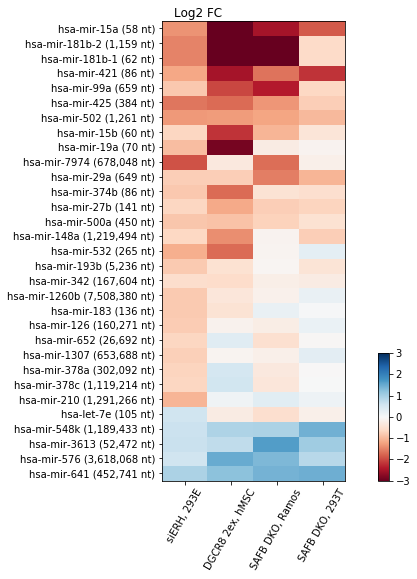

In [246]:
fCutoff_ERH = 400
fCutoff_Ex2 = 100
fCutoff_293T = 50
fCutoff_Ramos = 100

dfSelected = dfMerged[dfMerged['baseMean_ERH'] > fCutoff_ERH]
dfSelected = dfSelected[dfSelected['baseMean_DGCR8_ex2'] > fCutoff_Ex2]
dfSelected = dfSelected[dfSelected['baseMean_SAFBKO_293T'] > fCutoff_293T]
dfSelected = dfSelected[dfSelected['baseMean_SAFBKO_Ramos'] > fCutoff_Ramos]



#-------------------------------------------------------------------------

dfSelected['name'] = dfSelected.index
dfSelected['distance_comma'] = dfSelected.apply(lambda row: f'{abs(row["Distance (nt)"]):,}', axis=1)


dfSelected['name_distance'] = dfSelected.apply(lambda row: row['name'] + \
                                               ' (' + row['distance_comma'] + " nt)", axis=1)


                                               
dfSelected = dfSelected.loc[:,['log2FC_ERH','log2FC_DGCR8_ex2','log2FC_SAFBKO_Ramos','log2FC_SAFBKO_293T', 'name_distance']]
dfSelected = dfSelected.set_index('name_distance')


dfSelected['avg'] = dfSelected.apply(lambda row: np.mean(row), axis=1)

dfSelected = dfSelected.sort_values(['avg'], ascending=False)
dfSelected = dfSelected.iloc[:,:4]

def higher_or_lower(x):
    if x>0.5 or x<-0.5:
        return True
    else:
        return False
dfSelected = dfSelected[dfSelected.apply(lambda row: higher_or_lower(row['log2FC_ERH']), axis=1)]


fig = plt.figure(figsize=(8,8))

gs = gridspec.GridSpec(20,10)

ax = plt.subplot(gs[:,:5])
ax_right = plt.subplot(gs[14:,5:6])

im = ax.pcolor(dfSelected, cmap='RdBu', vmin=-3, vmax=3)
#ax.set_title('log2FC')
ax.set_xticks(np.arange(4)+0.5)
ax.set_xticklabels(['siERH, 293E','DGCR8 2ex, hMSC','SAFB DKO, Ramos','SAFB DKO, 293T'], rotation=60)    

ax.set_yticks(np.arange(len(dfSelected))+0.5)
ax.set_yticklabels(dfSelected.index.tolist())    
#ax.set_ylim((-0.1,1.1))

plt.colorbar(im, cax=ax_right)
    
#plt.colorbar()
#plt.xticks(np.arange(1, len(lNames)+1), lNames)
#plt.title('s21, cleavage efficiency (using only productive processing)')
#plt.ylabel('log2 cleavage efficiency')
plt.suptitle('Log2 FC', x=0.35, y=0.999)
plt.tight_layout()

#plt.show()
plt.savefig('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/{}.pdf'.format('heatmap'), transparent=True)
plt.close()

# Do not use anymore

# DGCR8 2ex hMSC

In [19]:
# Deseq data

dfDeseq = pd.read_csv('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/deseq_results_DGCR8_ex2.csv', index_col=0)
fCutoff_baseMean = 100 #234 miRNA are expressed in this condition
#fCutoff_baseMean = 1400 #200 miRNA are expressed in this condition
fCutoff_FC = 1
fCutoff_P = 0.1 # padj
sSample = 'hMSC_DG2ex'

In [20]:
dfDeseq['name'] = dfDeseq.index
dfDeseq = dfDeseq.fillna(1) #NaN in padj into 1
dfDeseq['-log_padj'] = dfDeseq.apply(lambda row: -np.log(row['padj']), axis=1)

# filter (expression level)
dfDeseq = dfDeseq[dfDeseq['baseMean'] > fCutoff_baseMean]

# select some miRNAs
dfDeseq['isFC'] = dfDeseq.apply(lambda row: 
                                True if row['log2FoldChange'] > fCutoff_FC or row['log2FoldChange'] < -fCutoff_FC 
                                else False,
                                axis=1)
dfDeseq['isP'] = dfDeseq.apply(lambda row: True if row['padj'] < fCutoff_P else False, axis=1)
dfDeseq

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,-log_padj,isFC,isP
hsa-let-7a-1,9.666015e+04,0.294661,0.168587,1.747824,8.049453e-02,2.036706e-01,hsa-let-7a-1,1.591251,False,False
hsa-let-7a-2,9.605451e+04,0.301386,0.168767,1.785806,7.413068e-02,1.907509e-01,hsa-let-7a-2,1.656787,False,False
hsa-let-7a-3,9.666205e+04,0.294429,0.168602,1.746291,8.076037e-02,2.036706e-01,hsa-let-7a-3,1.591251,False,False
hsa-let-7b,2.209431e+03,-0.537586,0.183739,-2.925817,3.435529e-03,1.587365e-02,hsa-let-7b,4.143095,False,True
hsa-let-7c,2.960214e+03,-0.299211,0.171978,-1.739824,8.188988e-02,2.056996e-01,hsa-let-7c,1.581338,False,False
hsa-let-7d,2.564057e+03,-0.103734,0.176435,-0.587944,5.565701e-01,7.642275e-01,hsa-let-7d,0.268890,False,False
hsa-let-7e,1.598249e+04,-0.238038,0.164899,-1.443539,1.488686e-01,3.140712e-01,hsa-let-7e,1.158135,False,False
hsa-let-7f-1,7.924783e+04,-0.320585,0.187178,-1.712730,8.676214e-02,2.128699e-01,hsa-let-7f-1,1.547074,False,False
hsa-let-7f-2,7.955777e+04,-0.318932,0.187118,-1.704441,8.829864e-02,2.135432e-01,hsa-let-7f-2,1.543916,False,False
hsa-let-7g,1.010028e+05,0.094401,0.185156,0.509846,6.101594e-01,8.046477e-01,hsa-let-7g,0.217351,False,False


In [21]:
dfDeseqSelected = dfDeseq[dfDeseq['isFC'] == True]
dfDeseqSelected = dfDeseqSelected[dfDeseqSelected['isP'] == True]
dfDeseqSelected

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,-log_padj,isFC,isP
hsa-mir-10a,1773.128873,-2.061571,0.182550,-11.293206,1.417690e-29,9.971089e-28,hsa-mir-10a,62.172693,True,True
hsa-mir-1278,428.338970,1.903057,0.223474,8.515805,1.654370e-17,4.986744e-16,hsa-mir-1278,35.234578,True,True
hsa-mir-1287,126.297495,1.118769,0.314980,3.551873,3.824995e-04,2.284171e-03,hsa-mir-1287,6.081752,True,True
hsa-mir-1294,104.428735,1.481571,0.343527,4.312825,1.611815e-05,1.244243e-04,hsa-mir-1294,8.991813,True,True
hsa-mir-1304,108.026653,1.186738,0.342826,3.461634,5.369077e-04,3.118005e-03,hsa-mir-1304,5.770562,True,True
hsa-mir-148a,2346.364063,-1.406235,0.187581,-7.496701,6.544411e-14,1.657045e-12,hsa-mir-148a,27.125985,True,True
hsa-mir-15a,200.848957,-4.491670,0.373438,-12.027903,2.535195e-33,2.005973e-31,hsa-mir-15a,70.684009,True,True
hsa-mir-15b,1413.277626,-2.156397,0.196644,-10.965988,5.568900e-28,2.711626e-26,hsa-mir-15b,58.869664,True,True
hsa-mir-16-1,5966.188499,-1.154452,0.194947,-5.921884,3.182737e-09,4.872562e-08,hsa-mir-16-1,16.837061,True,True
hsa-mir-16-2,7250.247727,-1.192978,0.209125,-5.704627,1.165979e-08,1.537635e-07,hsa-mir-16-2,15.687850,True,True


In [22]:
lFC = dfDeseq['log2FoldChange'].tolist()
lPadj = dfDeseq['-log_padj'].tolist()

lSelectedName = dfDeseqSelected['name'].tolist()
lSelectedFC = dfDeseqSelected['log2FoldChange'].tolist()
lSelectedPadj = dfDeseqSelected['-log_padj'].tolist()

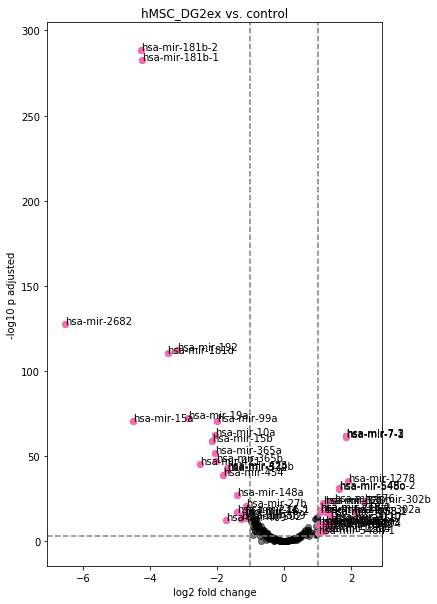

In [24]:
# figure        
fig, ax = plt.subplots(figsize=(6,10))

ax.scatter(lFC, lPadj, color='black', alpha=0.5)
ax.scatter(lSelectedFC, lSelectedPadj, color='hotpink')

for nOrder, sNameMir in enumerate(lSelectedName):
    if np.isnan(lSelectedFC[nOrder]) == True:
        continue
    if np.isnan(lSelectedPadj[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lSelectedFC[nOrder], lSelectedPadj[nOrder]))


plt.axhline(-np.log(0.05), color='gray', linestyle='--')
plt.axvline(-1, color='gray', linestyle='--')
plt.axvline(1, color='gray', linestyle='--')
#plt.xlim([-3.2, 3.2])
#plt.ylim([-5, 5])


plt.xlabel('log2 fold change')
plt.ylabel('-log10 p adjusted')
plt.title('{} vs. control'.format(sSample))
#plt.show()
#plt.savefig('/casa/jimkwon/PROJECT/ERH/results/200218_DESeq2/{}.pdf'.format(sSample))
#plt.close()

# SAFB DKO 293T

In [25]:
# Deseq data

dfDeseq = pd.read_csv('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/deseq_results_SAFBKO_293T.csv', index_col=0)
fCutoff_baseMean = 50 #159 miRNA are expressed in this condition
#fCutoff_baseMean = 1400 #200 miRNA are expressed in this condition
fCutoff_FC = 1
fCutoff_P = 0.1 # padj
sSample = '293T_SAFBKO'

In [26]:
dfDeseq['name'] = dfDeseq.index
dfDeseq = dfDeseq.fillna(1) #NaN in padj into 1
dfDeseq['-log_padj'] = dfDeseq.apply(lambda row: -np.log(row['padj']), axis=1)

# filter (expression level)
dfDeseq = dfDeseq[dfDeseq['baseMean'] > fCutoff_baseMean]

# select some miRNAs
dfDeseq['isFC'] = dfDeseq.apply(lambda row: 
                                True if row['log2FoldChange'] > fCutoff_FC or row['log2FoldChange'] < -fCutoff_FC 
                                else False,
                                axis=1)
dfDeseq['isP'] = dfDeseq.apply(lambda row: True if row['padj'] < fCutoff_P else False, axis=1)
dfDeseq

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,-log_padj,isFC,isP
hsa-let-7a-1,723.212157,0.306155,0.346173,0.884398,3.764815e-01,0.776145,hsa-let-7a-1,0.253416,False,False
hsa-let-7a-2,705.566057,0.306482,0.348677,0.878985,3.794094e-01,0.776145,hsa-let-7a-2,0.253416,False,False
hsa-let-7a-3,727.474682,0.301507,0.345967,0.871492,3.834855e-01,0.776145,hsa-let-7a-3,0.253416,False,False
hsa-let-7d,328.178591,0.061064,0.445110,0.137189,8.908813e-01,0.953359,hsa-let-7d,0.047764,False,False
hsa-let-7e,103.962455,-0.164114,0.331679,-0.494797,6.207435e-01,0.872725,hsa-let-7e,0.136135,False,False
hsa-let-7f-1,244.426613,0.227232,0.283145,0.802530,4.222462e-01,0.783454,hsa-let-7f-1,0.244043,False,False
hsa-let-7f-2,281.532040,0.245094,0.270533,0.905967,3.649534e-01,0.776145,hsa-let-7f-2,0.253416,False,False
hsa-let-7g,73.591371,0.132820,0.353647,0.375573,7.072345e-01,0.885089,hsa-let-7g,0.122067,False,False
hsa-mir-101-1,192.911775,-0.250103,0.295354,-0.846793,3.971107e-01,0.783454,hsa-mir-101-1,0.244043,False,False
hsa-mir-101-2,193.024352,-0.246762,0.294040,-0.839213,4.013496e-01,0.783454,hsa-mir-101-2,0.244043,False,False


In [27]:
dfDeseqSelected = dfDeseq[dfDeseq['isFC'] == True]
dfDeseqSelected = dfDeseqSelected[dfDeseqSelected['isP'] == True]
dfDeseqSelected

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,-log_padj,isFC,isP
hsa-mir-15a,66.040264,-1.846768,0.376242,-4.908456,9.179638e-07,3.235822e-05,hsa-mir-15a,10.338642,True,True
hsa-mir-181d,441.865875,-1.243459,0.250748,-4.958997,7.085816e-07,2.724818e-05,hsa-mir-181d,10.510524,True,True
hsa-mir-19b-1,1231.739176,-1.174359,0.283469,-4.142816,3.430679e-05,6.596261e-04,hsa-mir-19b-1,7.323837,True,True
hsa-mir-19b-2,1155.997288,-1.246632,0.276228,-4.513057,6.389975e-06,1.930685e-04,hsa-mir-19b-2,8.552465,True,True
hsa-mir-29a,65.484501,-1.017324,0.381391,-2.667405,7.643944e-03,6.585114e-02,hsa-mir-29a,2.720359,True,True
hsa-mir-29c,58.118623,-1.682081,0.388386,-4.330952,1.484660e-05,3.925071e-04,hsa-mir-29c,7.842956,True,True
hsa-mir-3144,142.370886,1.889958,0.396225,4.769906,1.843115e-06,5.997214e-05,hsa-mir-3144,9.721631,True,True
hsa-mir-3158-1,63.603467,2.230108,0.383034,5.822227,5.806848e-09,6.140742e-07,hsa-mir-3158-1,14.303150,True,True
hsa-mir-3158-2,63.603467,2.230108,0.383034,5.822227,5.806848e-09,6.140742e-07,hsa-mir-3158-2,14.303150,True,True
hsa-mir-3607,83.839128,-1.362436,0.424748,-3.207635,1.338313e-03,1.721090e-02,hsa-mir-3607,4.062212,True,True


In [28]:
lFC = dfDeseq['log2FoldChange'].tolist()
lPadj = dfDeseq['-log_padj'].tolist()

lSelectedName = dfDeseqSelected['name'].tolist()
lSelectedFC = dfDeseqSelected['log2FoldChange'].tolist()
lSelectedPadj = dfDeseqSelected['-log_padj'].tolist()

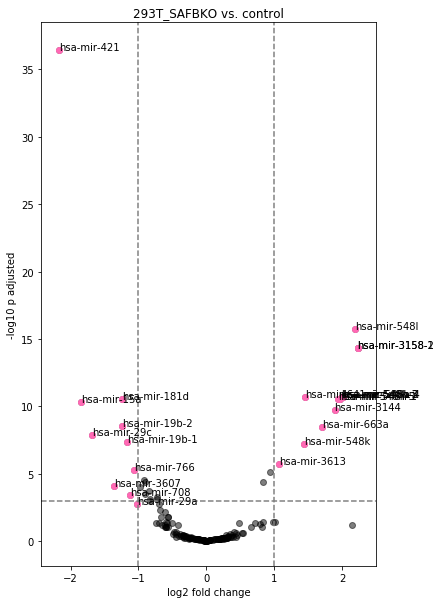

In [29]:
# figure        
fig, ax = plt.subplots(figsize=(6,10))

ax.scatter(lFC, lPadj, color='black', alpha=0.5)
ax.scatter(lSelectedFC, lSelectedPadj, color='hotpink')

for nOrder, sNameMir in enumerate(lSelectedName):
    if np.isnan(lSelectedFC[nOrder]) == True:
        continue
    if np.isnan(lSelectedPadj[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lSelectedFC[nOrder], lSelectedPadj[nOrder]))


plt.axhline(-np.log(0.05), color='gray', linestyle='--')
plt.axvline(-1, color='gray', linestyle='--')
plt.axvline(1, color='gray', linestyle='--')
#plt.xlim([-3.2, 3.2])
#plt.ylim([-5, 5])


plt.xlabel('log2 fold change')
plt.ylabel('-log10 p adjusted')
plt.title('{} vs. control'.format(sSample))
#plt.show()
#plt.savefig('/casa/jimkwon/PROJECT/ERH/results/200218_DESeq2/{}.pdf'.format(sSample))
#plt.close()

# SAFB DKO Ramos

In [30]:
# Deseq data

dfDeseq = pd.read_csv('/casa/jimkwon/PROJECT/ERH/results/200420_sRNAseq_RPM/deseq_results_SAFBKO_Ramos.csv', index_col=0)
fCutoff_baseMean = 100 #227 miRNA are expressed in this condition
#fCutoff_baseMean = 1400 #200 miRNA are expressed in this condition
fCutoff_FC = 1
fCutoff_P = 0.1 # padj
sSample = 'Ramos_SAFBKO'

In [31]:
dfDeseq['name'] = dfDeseq.index
dfDeseq = dfDeseq.fillna(1) #NaN in padj into 1
dfDeseq['-log_padj'] = dfDeseq.apply(lambda row: -np.log(row['padj']), axis=1)

# filter (expression level)
dfDeseq = dfDeseq[dfDeseq['baseMean'] > fCutoff_baseMean]

# select some miRNAs
dfDeseq['isFC'] = dfDeseq.apply(lambda row: 
                                True if row['log2FoldChange'] > fCutoff_FC or row['log2FoldChange'] < -fCutoff_FC 
                                else False,
                                axis=1)
dfDeseq['isP'] = dfDeseq.apply(lambda row: True if row['padj'] < fCutoff_P else False, axis=1)
dfDeseq

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,-log_padj,isFC,isP
hsa-let-7a-1,1162.913494,-0.278615,0.380196,-0.732818,4.636695e-01,7.511219e-01,hsa-let-7a-1,0.286187,False,False
hsa-let-7a-2,1152.120113,-0.273072,0.380877,-0.716956,4.734011e-01,7.570210e-01,hsa-let-7a-2,0.278364,False,False
hsa-let-7a-3,1162.491668,-0.278895,0.379971,-0.733988,4.629559e-01,7.511219e-01,hsa-let-7a-3,0.286187,False,False
hsa-let-7d,120.861332,0.204016,0.548407,0.372016,7.098811e-01,8.640414e-01,hsa-let-7d,0.146135,False,False
hsa-let-7e,1211.120478,-0.496580,0.373053,-1.331126,1.831477e-01,4.803885e-01,hsa-let-7e,0.733160,False,False
hsa-let-7f-1,310.727275,-0.173664,0.368200,-0.471659,6.371705e-01,8.424130e-01,hsa-let-7f-1,0.171485,False,False
hsa-let-7f-2,324.542186,-0.133271,0.362427,-0.367718,7.130836e-01,8.640414e-01,hsa-let-7f-2,0.146135,False,False
hsa-mir-101-1,721.635904,0.065137,0.402458,0.161849,8.714248e-01,9.379328e-01,hsa-mir-101-1,0.064077,False,False
hsa-mir-101-2,726.723339,0.063326,0.401768,0.157618,8.747582e-01,9.396817e-01,hsa-mir-101-2,0.062214,False,False
hsa-mir-103a-1,57668.408701,0.021954,0.341277,0.064330,9.487076e-01,9.698684e-01,hsa-mir-103a-1,0.030595,False,False


In [32]:
dfDeseqSelected = dfDeseq[dfDeseq['isFC'] == True]
dfDeseqSelected = dfDeseqSelected[dfDeseqSelected['isP'] == True]
dfDeseqSelected

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,name,-log_padj,isFC,isP
hsa-mir-105-1,223.734500,-1.422687,0.371886,-3.825603,1.304522e-04,1.888123e-03,hsa-mir-105-1,6.272172,True,True
hsa-mir-105-2,222.759303,-1.428740,0.371964,-3.841070,1.224992e-04,1.820934e-03,hsa-mir-105-2,6.308406,True,True
hsa-mir-1185-1,1189.078975,1.060749,0.380875,2.785029,5.352299e-03,4.266325e-02,hsa-mir-1185-1,3.154417,True,True
hsa-mir-1185-2,772.787172,1.234236,0.381375,3.236280,1.210987e-03,1.135236e-02,hsa-mir-1185-2,4.478330,True,True
hsa-mir-1306,111.832165,-2.866887,0.434658,-6.595725,4.231837e-11,5.789413e-09,hsa-mir-1306,18.967235,True,True
hsa-mir-132,767.416302,-1.944561,0.330962,-5.875485,4.216071e-09,3.312627e-07,hsa-mir-132,14.920354,True,True
hsa-mir-134,172.525148,-3.426726,0.522104,-6.563297,5.263103e-11,5.789413e-09,hsa-mir-134,18.967235,True,True
hsa-mir-144,518.594979,1.402654,0.423632,3.311020,9.295658e-04,9.831946e-03,hsa-mir-144,4.622118,True,True
hsa-mir-15a,279.135542,-2.497136,0.536080,-4.658138,3.190826e-06,7.312309e-05,hsa-mir-15a,9.523366,True,True
hsa-mir-15b,1283.381289,-1.026979,0.404550,-2.538569,1.113067e-02,7.557863e-02,hsa-mir-15b,2.582582,True,True


In [33]:
lFC = dfDeseq['log2FoldChange'].tolist()
lPadj = dfDeseq['-log_padj'].tolist()

lSelectedName = dfDeseqSelected['name'].tolist()
lSelectedFC = dfDeseqSelected['log2FoldChange'].tolist()
lSelectedPadj = dfDeseqSelected['-log_padj'].tolist()

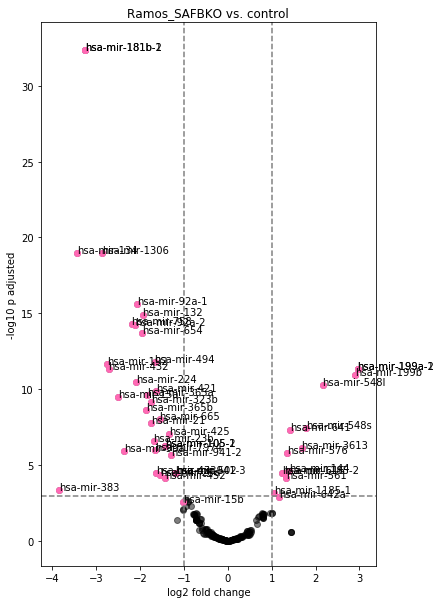

In [34]:
# figure        
fig, ax = plt.subplots(figsize=(6,10))

ax.scatter(lFC, lPadj, color='black', alpha=0.5)
ax.scatter(lSelectedFC, lSelectedPadj, color='hotpink')

for nOrder, sNameMir in enumerate(lSelectedName):
    if np.isnan(lSelectedFC[nOrder]) == True:
        continue
    if np.isnan(lSelectedPadj[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lSelectedFC[nOrder], lSelectedPadj[nOrder]))


plt.axhline(-np.log(0.05), color='gray', linestyle='--')
plt.axvline(-1, color='gray', linestyle='--')
plt.axvline(1, color='gray', linestyle='--')
#plt.xlim([-3.2, 3.2])
#plt.ylim([-5, 5])


plt.xlabel('log2 fold change')
plt.ylabel('-log10 p adjusted')
plt.title('{} vs. control'.format(sSample))
#plt.show()
#plt.savefig('/casa/jimkwon/PROJECT/ERH/results/200218_DESeq2/{}.pdf'.format(sSample))
#plt.close()

### distance and siERH

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


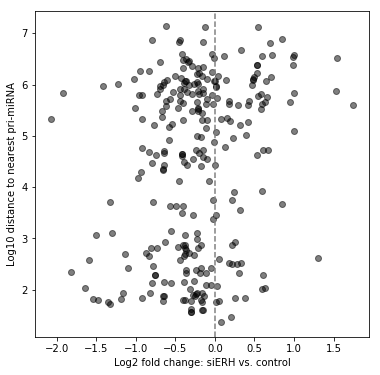

In [181]:
fCutoff_ERH = 400
fCutoff_Ex2 = 100
fCutoff_293T = 50
fCutoff_Ramos = 100

dfSelected = dfMerged[dfMerged['baseMean_ERH'] > fCutoff_ERH]
dfSelected = dfSelected.loc[:,['Distance (nt)','log2FC_ERH']]

dfSelected['log10 distance'] = dfSelected.apply(lambda row: np.log10(abs(row['Distance (nt)'])), axis=1)

lFC_Erh = dfSelected['log2FC_ERH'].astype(float).tolist()
lDistance = dfSelected['log10 distance'].astype(float).tolist()

###################################################
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(lFC_Erh, lDistance, color='black', alpha=0.5)
#ax.scatter(lSelectedFC, lSelectedCS_srsf3, color='hotpink')
"""
for nOrder, sNameMir in enumerate(lSelectedName):
    if np.isnan(lSelectedFC[nOrder]) == True:
        continue
    if np.isnan(lSelectedCS_srsf3[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lSelectedFC[nOrder], lSelectedCS_srsf3[nOrder]))    
""" 
    
plt.axvline(0, color='gray', linestyle='--')
#plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Log2 fold change: siERH vs. control')
plt.ylabel('Log10 distance to nearest pri-miRNA')
plt.show()

### distance and DGCR8 ex2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


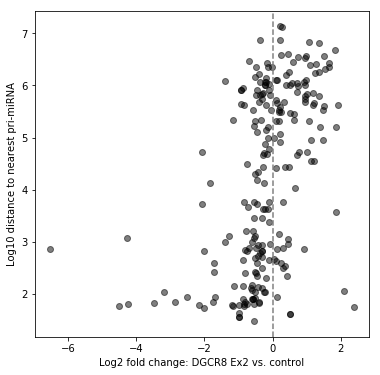

In [182]:
fCutoff_ERH = 400
fCutoff_Ex2 = 100
fCutoff_293T = 50
fCutoff_Ramos = 100

dfSelected = dfMerged[dfMerged['baseMean_DGCR8_ex2'] > fCutoff_Ex2]
dfSelected = dfSelected.loc[:,['Distance (nt)','log2FC_DGCR8_ex2']]


dfSelected['log10 distance'] = dfSelected.apply(lambda row: np.log10(abs(row['Distance (nt)'])), axis=1)

lFC_Ex2 = dfSelected['log2FC_DGCR8_ex2'].astype(float).tolist()
lDistance = dfSelected['log10 distance'].astype(float).tolist()

###################################################
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(lFC_Ex2, lDistance, color='black', alpha=0.5)
#ax.scatter(lSelectedFC, lSelectedCS_srsf3, color='hotpink')
"""
for nOrder, sNameMir in enumerate(lSelectedName):
    if np.isnan(lSelectedFC[nOrder]) == True:
        continue
    if np.isnan(lSelectedCS_srsf3[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lSelectedFC[nOrder], lSelectedCS_srsf3[nOrder]))    
""" 
    
plt.axvline(0, color='gray', linestyle='--')
#plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Log2 fold change: DGCR8 Ex2 vs. control')
plt.ylabel('Log10 distance to nearest pri-miRNA')
plt.show()

### distance and SAFB KO 293T


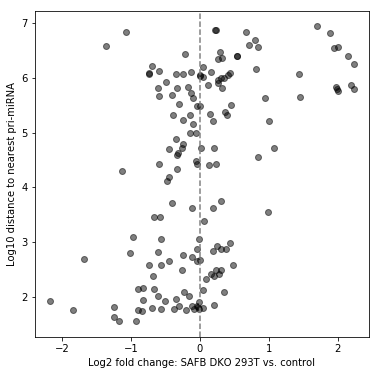

In [183]:
fCutoff_ERH = 400
fCutoff_Ex2 = 100
fCutoff_293T = 50
fCutoff_Ramos = 100

dfSelected = dfMerged[dfMerged['baseMean_SAFBKO_293T'] > fCutoff_293T]
dfSelected = dfSelected.loc[:,['Distance (nt)','log2FC_SAFBKO_293T']]


dfSelected['log10 distance'] = dfSelected.apply(lambda row: np.log10(abs(row['Distance (nt)'])), axis=1)

lFC_293T = dfSelected['log2FC_SAFBKO_293T'].astype(float).tolist()
lDistance = dfSelected['log10 distance'].astype(float).tolist()

###################################################
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(lFC_293T, lDistance, color='black', alpha=0.5)
#ax.scatter(lSelectedFC, lSelectedCS_srsf3, color='hotpink')
"""
for nOrder, sNameMir in enumerate(lSelectedName):
    if np.isnan(lSelectedFC[nOrder]) == True:
        continue
    if np.isnan(lSelectedCS_srsf3[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lSelectedFC[nOrder], lSelectedCS_srsf3[nOrder]))    
""" 
    
plt.axvline(0, color='gray', linestyle='--')
#plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Log2 fold change: SAFB DKO 293T vs. control')
plt.ylabel('Log10 distance to nearest pri-miRNA')
plt.show()

### distance and SAFB KO Ramos


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


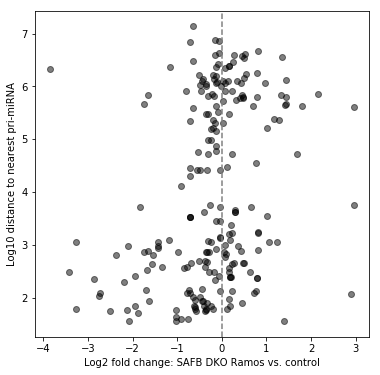

In [184]:
fCutoff_ERH = 400
fCutoff_Ex2 = 100
fCutoff_293T = 50
fCutoff_Ramos = 100

dfSelected = dfMerged[dfMerged['baseMean_SAFBKO_Ramos'] > fCutoff_Ramos]
dfSelected = dfSelected.loc[:,['Distance (nt)','log2FC_SAFBKO_Ramos']]


dfSelected['log10 distance'] = dfSelected.apply(lambda row: np.log10(abs(row['Distance (nt)'])), axis=1)

lFC_Ramos = dfSelected['log2FC_SAFBKO_Ramos'].astype(float).tolist()
lDistance = dfSelected['log10 distance'].astype(float).tolist()

###################################################
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(lFC_Ramos, lDistance, color='black', alpha=0.5)
#ax.scatter(lSelectedFC, lSelectedCS_srsf3, color='hotpink')
"""
for nOrder, sNameMir in enumerate(lSelectedName):
    if np.isnan(lSelectedFC[nOrder]) == True:
        continue
    if np.isnan(lSelectedCS_srsf3[nOrder]) == True:
        continue            

    ax.annotate(sNameMir, (lSelectedFC[nOrder], lSelectedCS_srsf3[nOrder]))    
""" 
    
plt.axvline(0, color='gray', linestyle='--')
#plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Log2 fold change: SAFB DKO Ramos vs. control')
plt.ylabel('Log10 distance to nearest pri-miRNA')
plt.show()

## only siERH FC>0.5 or <0.5

In [190]:
fCutoff_ERH = 400
fCutoff_Ex2 = 100
fCutoff_293T = 50
fCutoff_Ramos = 100

dfSelected = dfMerged[dfMerged['baseMean_ERH'] > fCutoff_ERH]
dfSelected = dfSelected[dfSelected['baseMean_DGCR8_ex2'] > fCutoff_Ex2]
dfSelected = dfSelected[dfSelected['baseMean_SAFBKO_293T'] > fCutoff_293T]
dfSelected = dfSelected[dfSelected['baseMean_SAFBKO_Ramos'] > fCutoff_Ramos]
dfSelected


,Nearest neighbor,Distance (nt),Cleavage Score w/ SRSF3,Cleavage Score w/ MP only,Lower stem (bp),Upper stem (bp),Loop (nt),Largest internal loop (nt),baseMean_ERH,log2FC_ERH,baseMean_DGCR8_ex2,log2FC_DGCR8_ex2,baseMean_SAFBKO_293T,log2FC_SAFBKO_293T,baseMean_SAFBKO_Ramos,log2FC_SAFBKO_Ramos
hsa-let-7a-1,hsa-let-7f-1,311,6.88,2.42,11.0,21.0,27.0,4.0,8683.520704,0.219420,96660.145445,0.294661,723.212157,0.306155,1162.913494,-0.278615
hsa-let-7a-2,hsa-mir-100,-5636,5.90,1.60,14.0,22.0,10.0,4.0,8225.384856,0.219430,96054.512173,0.301386,705.566057,0.306482,1152.120113,-0.273072
hsa-let-7a-3,hsa-mir-4763,744,4.11,-0.23,14.0,21.0,24.0,1.0,8742.881527,0.217220,96662.048433,0.294429,727.474682,0.301507,1162.491668,-0.278895
hsa-let-7d,hsa-let-7f-1,2401,5.56,2.16,15.0,21.0,30.0,2.0,732.139260,-0.029820,2564.057215,-0.103734,328.178591,0.061064,120.861332,0.204016
hsa-let-7e,hsa-mir-99b,105,5.94,2.47,13.0,22.0,18.0,4.0,1809.562573,0.600744,15982.490878,-0.238038,103.962455,-0.164114,1211.120478,-0.496580
hsa-let-7f-1,hsa-let-7a-1,311,5.70,0.22,13.0,23.0,28.0,5.0,4625.132328,0.281112,79247.834664,-0.320585,244.426613,0.227232,310.727275,-0.173664
hsa-let-7f-2,hsa-mir-98,-851,6.48,2.19,13.0,20.0,28.0,1.0,4868.416201,0.259757,79557.766557,-0.318932,281.532040,0.245094,324.542186,-0.133271
hsa-mir-101-1,hsa-mir-3671,-592,6.35,1.31,12.0,20.0,12.0,7.0,28683.759756,-0.362454,14031.753485,-0.357869,192.911775,-0.250103,721.635904,0.065137
hsa-mir-101-2,hsa-mir-4665,1157451,5.23,-0.56,10.0,20.0,9.0,1.0,28469.690580,-0.359631,14039.578765,-0.357224,193.024352,-0.246762,726.723339,0.063326
hsa-mir-103a-1,hsa-mir-218-2,-207173,6.60,1.32,13.0,20.0,12.0,2.0,43299.518523,-0.097496,52102.835921,0.095204,42552.029341,-0.136827,57668.408701,0.021954


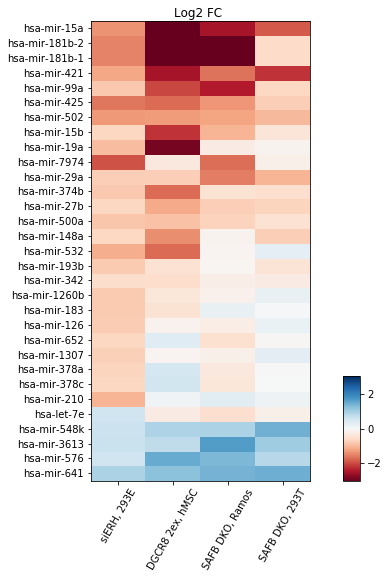

In [191]:
dfSelected = dfSelected.loc[:,['log2FC_ERH','log2FC_DGCR8_ex2','log2FC_SAFBKO_Ramos','log2FC_SAFBKO_293T']]
dfSelected['avg'] = dfSelected.apply(lambda row: np.mean(row), axis=1)

dfSelected = dfSelected.sort_values(['avg'], ascending=False)
dfSelected = dfSelected.iloc[:,:4]

def higher_or_lower(x):
    if x>0.5 or x<-0.5:
        return True
    else:
        return False
dfSelected = dfSelected[dfSelected.apply(lambda row: higher_or_lower(row['log2FC_ERH']), axis=1)]


fig = plt.figure(figsize=(8,8))

gs = gridspec.GridSpec(20,10)

ax = plt.subplot(gs[:,:5])
ax_right = plt.subplot(gs[15:,5:6])

im = ax.pcolor(dfSelected, cmap='RdBu', vmin=-3, vmax=3)
#ax.set_title('log2FC')
ax.set_xticks(np.arange(4)+0.5)
ax.set_xticklabels(['siERH, 293E','DGCR8 2ex, hMSC','SAFB DKO, Ramos','SAFB DKO, 293T'], rotation=60)    

ax.set_yticks(np.arange(len(dfSelected))+0.5)
ax.set_yticklabels(dfSelected.index.tolist())    
#ax.set_ylim((-0.1,1.1))

plt.colorbar(im, cax=ax_right)
    
#plt.colorbar()
#plt.xticks(np.arange(1, len(lNames)+1), lNames)
#plt.title('s21, cleavage efficiency (using only productive processing)')
#plt.ylabel('log2 cleavage efficiency')
plt.suptitle('Log2 FC', x=0.35, y=0.999)
plt.tight_layout()

plt.show()

## pcolor (heatmap)

In [144]:
fCutoff_ERH = 400
fCutoff_Ex2 = 100
fCutoff_293T = 50
fCutoff_Ramos = 100

dfSelected = dfMerged[dfMerged['baseMean_ERH'] > fCutoff_ERH]
dfSelected = dfSelected[dfSelected['baseMean_DGCR8_ex2'] > fCutoff_Ex2]
dfSelected = dfSelected[dfSelected['baseMean_SAFBKO_293T'] > fCutoff_293T]
dfSelected = dfSelected[dfSelected['baseMean_SAFBKO_Ramos'] > fCutoff_Ramos]
dfSelected


,Nearest neighbor,Distance (nt),Cleavage Score w/ SRSF3,Cleavage Score w/ MP only,Lower stem (bp),Upper stem (bp),Loop (nt),Largest internal loop (nt),baseMean_ERH,log2FC_ERH,baseMean_DGCR8_ex2,log2FC_DGCR8_ex2,baseMean_SAFBKO_293T,log2FC_SAFBKO_293T,baseMean_SAFBKO_Ramos,log2FC_SAFBKO_Ramos
hsa-let-7a-1,hsa-let-7f-1,311,6.88,2.42,11.0,21.0,27.0,4.0,8683.520704,0.219420,96660.145445,0.294661,723.212157,0.306155,1162.913494,-0.278615
hsa-let-7a-2,hsa-mir-100,-5636,5.90,1.60,14.0,22.0,10.0,4.0,8225.384856,0.219430,96054.512173,0.301386,705.566057,0.306482,1152.120113,-0.273072
hsa-let-7a-3,hsa-mir-4763,744,4.11,-0.23,14.0,21.0,24.0,1.0,8742.881527,0.217220,96662.048433,0.294429,727.474682,0.301507,1162.491668,-0.278895
hsa-let-7d,hsa-let-7f-1,2401,5.56,2.16,15.0,21.0,30.0,2.0,732.139260,-0.029820,2564.057215,-0.103734,328.178591,0.061064,120.861332,0.204016
hsa-let-7e,hsa-mir-99b,105,5.94,2.47,13.0,22.0,18.0,4.0,1809.562573,0.600744,15982.490878,-0.238038,103.962455,-0.164114,1211.120478,-0.496580
hsa-let-7f-1,hsa-let-7a-1,311,5.70,0.22,13.0,23.0,28.0,5.0,4625.132328,0.281112,79247.834664,-0.320585,244.426613,0.227232,310.727275,-0.173664
hsa-let-7f-2,hsa-mir-98,-851,6.48,2.19,13.0,20.0,28.0,1.0,4868.416201,0.259757,79557.766557,-0.318932,281.532040,0.245094,324.542186,-0.133271
hsa-mir-101-1,hsa-mir-3671,-592,6.35,1.31,12.0,20.0,12.0,7.0,28683.759756,-0.362454,14031.753485,-0.357869,192.911775,-0.250103,721.635904,0.065137
hsa-mir-101-2,hsa-mir-4665,1157451,5.23,-0.56,10.0,20.0,9.0,1.0,28469.690580,-0.359631,14039.578765,-0.357224,193.024352,-0.246762,726.723339,0.063326
hsa-mir-103a-1,hsa-mir-218-2,-207173,6.60,1.32,13.0,20.0,12.0,2.0,43299.518523,-0.097496,52102.835921,0.095204,42552.029341,-0.136827,57668.408701,0.021954


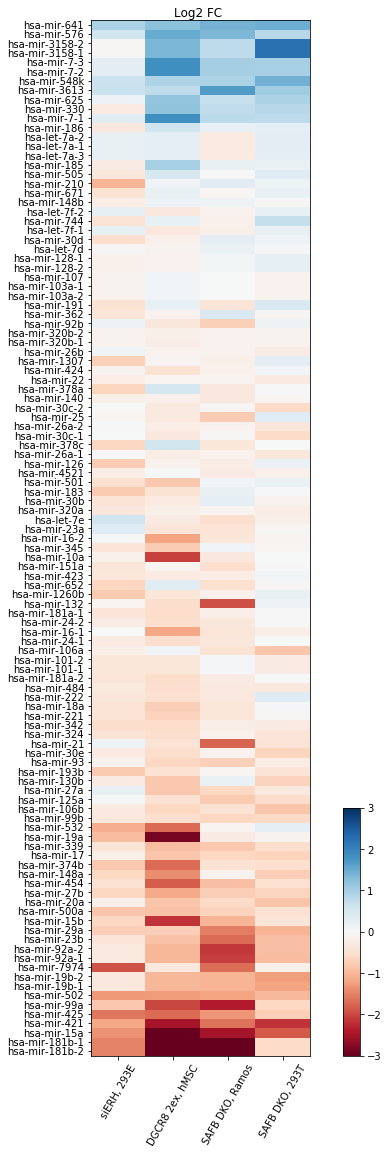

In [145]:
dfSelected = dfSelected.loc[:,['log2FC_ERH','log2FC_DGCR8_ex2','log2FC_SAFBKO_Ramos','log2FC_SAFBKO_293T']]
dfSelected['avg'] = dfSelected.apply(lambda row: np.median(row), axis=1)

dfSelected = dfSelected.sort_values(['avg'])
dfSelected = dfSelected.iloc[:,:4]

fig = plt.figure(figsize=(8,16))

gs = gridspec.GridSpec(20,10)

ax = plt.subplot(gs[:,:5])
ax_right = plt.subplot(gs[15:,5:6])

im = ax.pcolor(dfSelected, cmap='RdBu', vmin=-3, vmax=3)
#ax.set_title('log2FC')
ax.set_xticks(np.arange(4)+0.5)
ax.set_xticklabels(['siERH, 293E','DGCR8 2ex, hMSC','SAFB DKO, Ramos','SAFB DKO, 293T'], rotation=60)    

ax.set_yticks(np.arange(len(dfSelected))+0.5)
ax.set_yticklabels(dfSelected.index.tolist())    
#ax.set_ylim((-0.1,1.1))

plt.colorbar(im, cax=ax_right)
    
#plt.colorbar()
#plt.xticks(np.arange(1, len(lNames)+1), lNames)
#plt.title('s21, cleavage efficiency (using only productive processing)')
#plt.ylabel('log2 cleavage efficiency')
plt.suptitle('Log2 FC', x=0.35, y=0.999)
plt.tight_layout()

#plt.show()

## more stringency on expression level

In [146]:
fCutoff_ERH = 900
fCutoff_Ex2 = 300
fCutoff_293T = 150
fCutoff_Ramos = 300

dfSelected = dfMerged[dfMerged['baseMean_ERH'] > fCutoff_ERH]
dfSelected = dfSelected[dfSelected['baseMean_DGCR8_ex2'] > fCutoff_Ex2]
dfSelected = dfSelected[dfSelected['baseMean_SAFBKO_293T'] > fCutoff_293T]
dfSelected = dfSelected[dfSelected['baseMean_SAFBKO_Ramos'] > fCutoff_Ramos]
dfSelected


,Nearest neighbor,Distance (nt),Cleavage Score w/ SRSF3,Cleavage Score w/ MP only,Lower stem (bp),Upper stem (bp),Loop (nt),Largest internal loop (nt),baseMean_ERH,log2FC_ERH,baseMean_DGCR8_ex2,log2FC_DGCR8_ex2,baseMean_SAFBKO_293T,log2FC_SAFBKO_293T,baseMean_SAFBKO_Ramos,log2FC_SAFBKO_Ramos
hsa-let-7a-1,hsa-let-7f-1,311,6.88,2.42,11.0,21.0,27.0,4.0,8683.520704,0.219420,96660.145445,0.294661,723.212157,0.306155,1162.913494,-0.278615
hsa-let-7a-2,hsa-mir-100,-5636,5.90,1.60,14.0,22.0,10.0,4.0,8225.384856,0.219430,96054.512173,0.301386,705.566057,0.306482,1152.120113,-0.273072
hsa-let-7a-3,hsa-mir-4763,744,4.11,-0.23,14.0,21.0,24.0,1.0,8742.881527,0.217220,96662.048433,0.294429,727.474682,0.301507,1162.491668,-0.278895
hsa-let-7f-1,hsa-let-7a-1,311,5.70,0.22,13.0,23.0,28.0,5.0,4625.132328,0.281112,79247.834664,-0.320585,244.426613,0.227232,310.727275,-0.173664
hsa-let-7f-2,hsa-mir-98,-851,6.48,2.19,13.0,20.0,28.0,1.0,4868.416201,0.259757,79557.766557,-0.318932,281.532040,0.245094,324.542186,-0.133271
hsa-mir-101-1,hsa-mir-3671,-592,6.35,1.31,12.0,20.0,12.0,7.0,28683.759756,-0.362454,14031.753485,-0.357869,192.911775,-0.250103,721.635904,0.065137
hsa-mir-101-2,hsa-mir-4665,1157451,5.23,-0.56,10.0,20.0,9.0,1.0,28469.690580,-0.359631,14039.578765,-0.357224,193.024352,-0.246762,726.723339,0.063326
hsa-mir-103a-1,hsa-mir-218-2,-207173,6.60,1.32,13.0,20.0,12.0,2.0,43299.518523,-0.097496,52102.835921,0.095204,42552.029341,-0.136827,57668.408701,0.021954
hsa-mir-103a-2,hsa-mir-1292,1264652,6.04,0.88,13.0,22.0,6.0,2.0,44205.458597,-0.097072,52257.618268,0.094027,42610.496029,-0.136125,58001.058411,0.019057
hsa-mir-106a,hsa-mir-18b,-87,4.19,1.76,13.0,25.0,3.0,4.0,12355.305781,-0.168677,328.758745,0.117739,776.057167,-0.827143,5110.695291,-0.428325


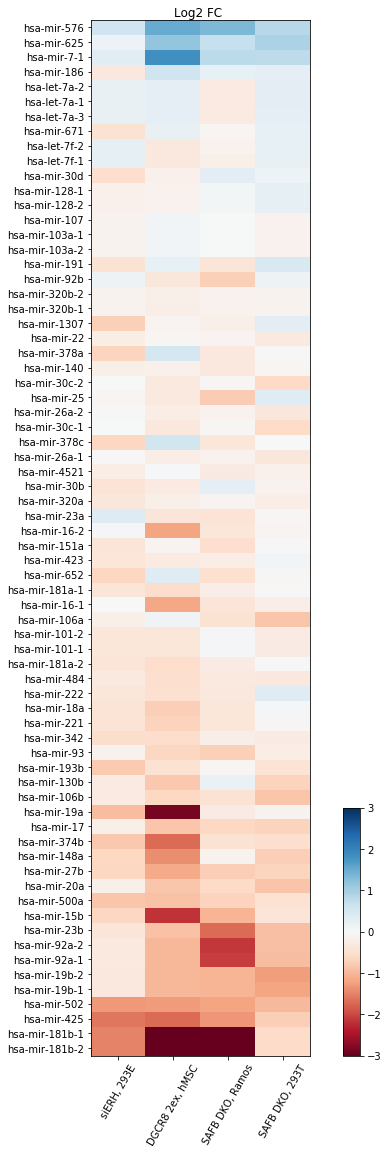

In [147]:
dfSelected = dfSelected.loc[:,['log2FC_ERH','log2FC_DGCR8_ex2','log2FC_SAFBKO_Ramos','log2FC_SAFBKO_293T']]
dfSelected['avg'] = dfSelected.apply(lambda row: np.median(row), axis=1)

dfSelected = dfSelected.sort_values(['avg'])
dfSelected = dfSelected.iloc[:,:4]

fig = plt.figure(figsize=(8,16))

gs = gridspec.GridSpec(20,10)

ax = plt.subplot(gs[:,:5])
ax_right = plt.subplot(gs[15:,5:6])

im = ax.pcolor(dfSelected, cmap='RdBu', vmin=-3, vmax=3)
#ax.set_title('log2FC')
ax.set_xticks(np.arange(4)+0.5)
ax.set_xticklabels(['siERH, 293E','DGCR8 2ex, hMSC','SAFB DKO, Ramos','SAFB DKO, 293T'], rotation=60)    

ax.set_yticks(np.arange(len(dfSelected))+0.5)
ax.set_yticklabels(dfSelected.index.tolist())    
#ax.set_ylim((-0.1,1.1))

plt.colorbar(im, cax=ax_right)
    
#plt.colorbar()
#plt.xticks(np.arange(1, len(lNames)+1), lNames)
#plt.title('s21, cleavage efficiency (using only productive processing)')
#plt.ylabel('log2 cleavage efficiency')
plt.suptitle('Log2 FC', x=0.35, y=0.999)
plt.tight_layout()

#plt.show()